## Simple Quintiles

In [11]:
import numpy as np

# Tạo dữ liệu mẫu cho Recency, Frequency và Monetary với tầm 100 dòng
np.random.seed(0)  # Để đảm bảo sự khảnh khám trong việc tạo dữ liệu mẫu

n_rows = 100
recency = np.random.randint(1, 51, n_rows)  # Recency từ 1 đến 50
frequency = np.random.randint(1, 11, n_rows)  # Frequency từ 1 đến 10
monetary = np.random.randint(10, 501, n_rows)  # Monetary từ 10 đến 500

# Tạo DataFrame từ dữ liệu mẫu
data = {
    'Recency': recency,
    'Frequency': frequency,
    'Monetary': monetary
}

import pandas as pd

df = pd.DataFrame(data)

# In ra 5 dòng đầu của DataFrame
print(df.head())


   Recency  Frequency  Monetary
0       45          6       199
1       48         10       207
2        1          4       225
3        4          1        53
4        4          6        42


In [12]:
df

,Recency,Frequency,Monetary
0,45,6,199
1,48,10,207
2,1,4,225
3,4,1,53
4,4,6,42
...,...,...,...
95,16,3,406
96,14,4,54
97,22,7,383
98,49,4,263


In [13]:

# Tính điểm R, F, và M tự động chia thành 5 phân đoạn
df['R_Score'] = pd.qcut(df['Recency'], 5, labels=['5','4','3','2','1'], duplicates='drop')
df['F_Score'] = pd.qcut(df['Frequency'], 5, labels=['1','2','3','4','5'], duplicates='drop') 
df['M_Score'] = pd.qcut(df['Monetary'], 5, labels=['1','2','3','4','5'], duplicates='drop') 


In [15]:
df_rfm = df

In [16]:
df_rfm['R_Score'] = df_rfm['R_Score'].astype(int)
df_rfm['F_Score'] = df_rfm['F_Score'].astype(int)
df_rfm['M_Score'] = df_rfm['M_Score'].astype(int)

df_rfm['RFM_Score'] = df_rfm['R_Score']*100 + df_rfm['F_Score']*10 + df_rfm['M_Score']


In [17]:
df_rfm.loc[df_rfm['RFM_Score'].isin([555, 554, 544, 545, 454, 455, 445]), 'Segmentation'] = 'Champions'

df_rfm.loc[df_rfm['RFM_Score'].isin([543, 444, 435, 355, 354, 345, 344, 335]), 'Segmentation'] = 'Loyal Customers'

df_rfm.loc[df_rfm['RFM_Score'].isin([553, 551, 552, 541, 542, 533, 532, 531
                                     , 452, 451, 442, 441, 431, 453, 433, 432
                                     , 423, 353, 352, 351, 342, 341, 333, 323]), 'Segmentation'] = 'Potential Loyalists'

df_rfm.loc[df_rfm['RFM_Score'].isin([512, 511, 422, 421, 412, 411, 311]), 'Segmentation'] = 'Recent Customers'

df_rfm.loc[df_rfm['RFM_Score'].isin([525, 524, 523, 522, 521, 515, 514
                                     , 513, 425,424, 413,414,415, 315, 314, 313]), 'Segmentation'] = 'Promising'

df_rfm.loc[df_rfm['RFM_Score'].isin([535, 534, 443, 434, 343, 334, 325, 324]), 'Segmentation'] = 'Need Attention'

df_rfm.loc[df_rfm['RFM_Score'].isin([331, 321, 312, 221, 213]), 'Segmentation'] = 'About To Sleep'

df_rfm.loc[df_rfm['RFM_Score'].isin([155, 154, 144, 214, 215, 115, 114, 113]), 'Segmentation'] = 'Cannot Lose Them'

df_rfm.loc[df_rfm['RFM_Score'].isin([255, 254, 245, 244, 253, 252, 243, 242
                                     , 235, 234, 225, 224, 153, 152, 145, 143
                                     , 142, 135, 134, 133, 125, 124]), 'Segmentation'] = 'At Risk'

df_rfm.loc[df_rfm['RFM_Score'].isin([332, 322, 231, 241, 251
                                     , 233, 232, 223, 222
                                     , 132, 123, 122, 212, 211]), 'Segmentation'] = 'Hibernating'

df_rfm.loc[df_rfm['RFM_Score'].isin([111, 112, 121, 131, 141, 151]), 'Segmentation'] = 'Lost Customers'

In [18]:
df_rfm

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segmentation
0,45,6,199,1,3,2,132,Hibernating
1,48,10,207,1,5,2,152,At Risk
2,1,4,225,5,2,3,523,Promising
3,4,1,53,5,1,1,511,Recent Customers
4,4,6,42,5,3,1,531,Potential Loyalists
...,...,...,...,...,...,...,...,...
95,16,3,406,4,1,5,415,Promising
96,14,4,54,4,2,1,421,Recent Customers
97,22,7,383,3,4,5,345,Loyal Customers
98,49,4,263,1,2,3,123,Hibernating


## KMeans

In [20]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [25]:
df_km = df[['Recency','Frequency','Monetary']]

In [30]:

# Chuẩn hóa dữ liệu nếu cần

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_km)

# Chọn số cụm (K) bằng Elbow Method

wcss = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss[k] = kmeans.inertia_

Text(0.5, 1.0, 'Elbow Method')

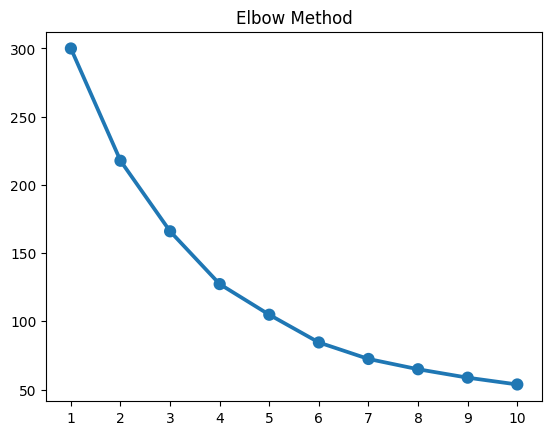

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pointplot(x= list(wcss.keys())
              ,y = list(wcss.values()))
plt.title('Elbow Method')

In [29]:
# Apply Kmeans
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Cluster info
cluster_info = df.groupby('Cluster').mean()
cluster_info

c:\Users\tunm2\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tunm2\AppData\Local\Temp\ipykernel_17512\1547718622.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_info = df.groupby('Cluster').mean()


,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
Cluster,,,,,,,
0,16.525000,2.775,253.475000,3.650000,1.450000,3.125000,382.625000
1,39.657143,6.400,194.171429,1.542857,3.171429,2.457143,188.457143
2,12.040000,8.200,306.360000,4.040000,4.040000,3.560000,447.960000
